# MLG: Unsupervised learning (Part 1)

Throughout the laboratories, questions that you should try to answer are highlighted as follows :

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Try to answer these questions / run the proposed experiments for your own comprehension. </p>


## Introduction

In this laboratory, we will work with a different type of problem called unsupervised learning.
When we talk about unsupervised learning, it means that we are trying to find **hidden structure** in unlabeled data. Therefore, no simple measure exists to evaluate a potential solution.


We will focus on a commonly used algorithm to solve this kind of problem called "Self Organizing Maps".
As you saw in the theoretical part of the course, the main advantage of this algorithm is its topological ordering, which means that the maps can be visualized as **elastic grids**. Therefore they can be easily plotted.

## Pre-requisites

For the following exercises, you could need several new packages. Install them as follows:

    !pip install name_of_the_missing_module
    
After these, you should be able to import them.

## Exercise 1 : Animals database clustering with the K-Means algorithm

### Dataset information

Each row is an animal, and it is constructed by the presence (1) or absence (0) of 13 different attributes. You can look at the plot hereafter, or generate it yourself with this code:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import cm
%matplotlib inline

In [2]:
matrix = np.array([[1,0,0,1,0,0,0,0,1,0,0,1,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,1],
                   [1,0,0,1,0,0,0,1,1,0,0,1,1],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,0,1,1,0,0,0,1,0,0,0],
                   [0,1,0,0,1,1,0,0,0,0,1,0,0],
                   [0,1,0,0,1,1,0,1,0,1,1,0,0],
                   [1,0,0,0,1,1,0,0,0,1,0,0,0],
                   [0,0,1,0,1,1,0,0,0,1,1,0,0],
                   [0,0,1,0,1,1,0,1,0,1,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,0,0,0,0,0,0]])

animals = pd.DataFrame(matrix.astype(float),columns=['small', 'medium', 'big', '2legs', '4legs', 'hair', 'hooves',
                                'mane', 'feathers', 'hunt', 'run', 'fly', 'swim'])

animals.index = ['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox',
                 'dog', 'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow']

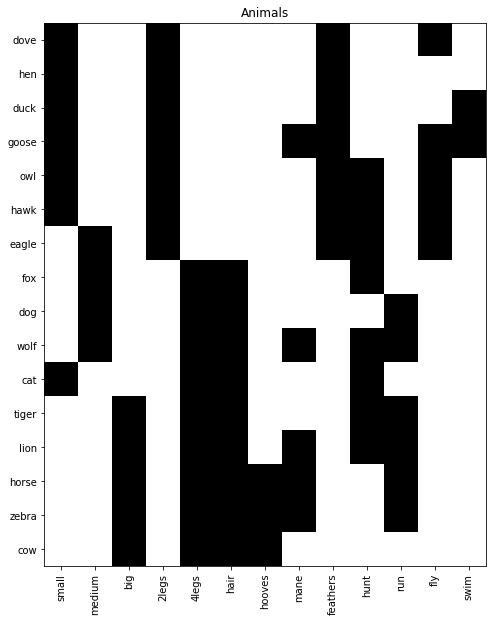

In [3]:
pl.figure(figsize=(8,10))
pl.xticks(np.arange(matrix.shape[1]), animals.columns, rotation=90)
pl.yticks(np.arange(matrix.shape[0]), animals.index)
pl.title('Animals')
_ = pl.imshow(matrix, interpolation='nearest', cmap=cm.binary)

These are features on which we will run our K-Means algorithm in order to find an inherent data structure, or similarities between samples.

### Building the model

In [4]:
from sklearn.cluster import KMeans

In [18]:
K = 3
kmeans = KMeans(n_clusters=K, n_init=1, init='random').fit(animals.values)

In [19]:
print(animals.index)
print(kmeans.labels_)

Index(['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox', 'dog',
       'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow'],
      dtype='object')
[1 0 0 0 1 1 1 2 2 2 2 2 2 2 2 2]


In [7]:
for g in range(K):
    print(f'Group {g}')
    print('    ', end='')
    for a in animals.index[kmeans.labels_ == g]:
        print(a, end=' ')
    print()

Group 0
    eagle 
Group 1
    dove hen duck goose owl hawk 
Group 2
    fox dog wolf cat tiger lion horse zebra cow 


<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Observe the animals that are grouped together by K-Means and try different numbers of clusters: K=2,3,4, etc. </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: n_init is a parameter that automatically asks K-means to try different cluster initializations and selects the best result. init='random' asks K-means to randomly initialize the cluster centroids. Please, try init=’k-means++’ and modify n_init to 10 for example and observe the results. </p>

## Exercice 2 : Wine database clustering with K-Means

Now, use the K-means algorithm to separate the three types of wine in the Wine dataset (K = 3).

In [8]:
from sklearn.datasets import load_wine

In [9]:
data = load_wine()

features = data.data
classes = data.target

classes_names = data.target_names

In [10]:
kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++').fit(features)

In [11]:
print(kmeans.labels_)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Observe the observations that are grouped together by K-Means. </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Count the number of "bottles" that are correctly grouped. What is the accuracy of this unsupervised classification? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Try to improve the performance of the classification. Does normalizing the data increases the accuracy? Does selecting a reduced number of features improves the accuracy? Why?. </p>